# The Developmental Divide: Why is Burundi Lagging Behind Rwanda?

### Project Overview
This project aims to analyze and compare the **economic, educational, and political stability** factors of Burundi and Rwanda to understand why Burundi is lagging behind Rwanda. The methodology involves several steps:

1. Data Collection and Cleaning: Gathering and cleaning data on GDP growth rates, GDP per capita, FDI, literacy rates, school enrollment figures, education investments, and political stability indicators.
2. Data Manipulation: Preparing the data for analysis using Pandas, including handling missing values and structuring the data.
3. Correlation Analysis: Identifying relationships between different variables using **correlation analysis** with Python.
4. Visualization: Creating **visual representations** of the data using Plotly, Seaborn, and Matplotlib to uncover trends and patterns.

The project leverages these techniques to provide insights into the factors contributing to Burundi’s lag compared to Rwanda, focusing on how economic performance and development are influenced by these variabless.cation.

### Objectives
1. **Economic Development Comparison:** Compare economic growth and performance metrics between Burundi and Rwanda.
2. **Feature Correlations:** Perform a correlation analysis between different indicators against GDP growth rate.
3. **Unemployment Analysis:** Examine the unemployment levels in each country and the causes.
4. **Educational Analysis:** Examine educational outcomes, literacy rates, and the impact of education on economic growth.
5. **Political Analysis:** Assess the impact of political stability on economic performance and growth.
6. **Foreign Direct Investment (FDI) Analysis:** Evaluate FDI inflows and their relationship with economic growth in both countries

### Import the necessary libraries for the project

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### reading the file and merging data sets

The dataset was collected from the World Bank and consists of various indicators related to economics, politics, and education. These indicators are stored in separate CSV files and need to be merged into a single DataFrame for analysis.

In [2]:
current_directory = os.getcwd()

data= pd.concat([pd.read_csv(os.path.join(current_directory, file))
                            for file in os.listdir(current_directory)
                            if file.endswith('.csv')])

data.to_csv('Indicators.csv' ,index=False)

print("All CSV files have been merged into 'Indicators.csv' in the directory ")

All CSV files have been merged into 'Indicators.csv' in the directory 


In [3]:
data = pd.read_csv('Indicators.csv')

In [4]:
data.head()

,Country Name,Series Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Burundi,GDP (current US$)(billion),2.032,2.236,2.333,2.452,2.706,3.104,2.644,2.724,2.667,2.577,2.650,2.776,3.339
1,Burundi,GDP growth (annual %),5.124,4.033,4.447,4.924,4.241,-3.900,-0.600,0.500,1.610,1.813,0.327,3.100,1.849
2,Burundi,"Inflation, GDP deflator (annual %)",8.562,8.364,14.294,7.953,5.306,21.319,0.973,11.449,-2.851,0.852,5.967,8.517,18.332
3,Burundi,Population,9.127,9.456,9.795,10.150,10.495,10.727,10.903,11.156,11.493,11.875,12.220,12.551,12.890
4,Burundi,Employment in industry,2.989,3.102,3.231,3.371,3.497,3.465,3.476,3.472,3.278,3.134,3.083,3.122,3.119


# Data Cleaning!
### Checking the information of our merged dataset and for missing data

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  34 non-null     object 
 1   Series Name   34 non-null     object 
 2   2010          34 non-null     float64
 3   2011          34 non-null     float64
 4   2012          34 non-null     float64
 5   2013          34 non-null     float64
 6   2014          34 non-null     float64
 7   2015          34 non-null     float64
 8   2016          34 non-null     float64
 9   2017          34 non-null     float64
 10  2018          34 non-null     float64
 11  2019          34 non-null     float64
 12  2020          34 non-null     float64
 13  2021          34 non-null     float64
 14  2022          34 non-null     float64
dtypes: float64(13), object(2)
memory usage: 4.8+ KB


In [6]:
data.isnull().sum()
# checking for missing values

Country Name    6
Series Name     6
2010            6
2011            6
2012            6
2013            6
2014            6
2015            6
2016            6
2017            6
2018            6
2019            6
2020            6
2021            6
2022            6
dtype: int64

#### Dropping null rows

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Country Name    0
Series Name     0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

### Restructuring data

You might have noticed that most of the columns in our data set are for the different years. We want to change it so that all the years are combined into one column. Then, we'll have separate columns for each feature, with values for each year. This will make it easier to look at the data and analyze trends over time.



In [9]:
# Melt the Data: Convert wide-format data into long-format 
#It combines year columns into a single 'Year' column and keeps 'Country Name' and 'Series Name' as identifiers.
melted_data = pd.melt(
    data,
    id_vars=['Country Name', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

# Pivot the Data: Transform the long-format data back into a wide format.
#This creates columns for each 'Series Name' with corresponding values for each 'Year'.
data1 = melted_data.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

data1.head()


Series Name,Country Name,Year,Control of Corruption: Estimate,Employers,Employment in agriculture,Employment in industry,Employment in services,"FDI, net inflows (% of GDP)","FDI, net inflows (BoP, current US$)(million)",GDP (current US$)(billion),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Government expenditure on education, total (% of GDP)","Inflation, GDP deflator (annual %)",Political Stability and Absence of Violence/Terrorism: Estimate,Population,Rule of Law: Estimate,Unemployment
0,Burundi,2010,-1.169,0.679,88.288,2.989,8.723,0.038,0.781,2.032,5.124,222.661,0.318,6.775,8.562,-1.626,9.127,-1.205,1.612
1,Burundi,2011,-1.208,0.683,87.740,3.102,9.158,0.150,3.355,2.236,4.033,236.451,0.412,6.319,8.364,-1.807,9.456,-1.154,1.599
2,Burundi,2012,-1.469,0.691,87.195,3.231,9.574,0.026,0.605,2.333,4.447,238.206,0.824,6.168,14.294,-1.705,9.795,-1.084,1.591
3,Burundi,2013,-1.426,0.705,86.715,3.371,9.914,4.761,116.727,2.452,4.924,241.548,1.264,5.995,7.953,-1.350,10.150,-1.076,1.584
4,Burundi,2014,-1.268,0.719,86.185,3.497,10.318,3.021,81.747,2.706,4.241,257.819,0.811,6.785,5.306,-0.784,10.495,-0.970,1.572


#### checking the information of our restructured DataFrame

In [10]:
# We have 19 columns total 

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 19 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country Name                                                     26 non-null     object 
 1   Year                                                             26 non-null     object 
 2   Control of Corruption: Estimate                                  26 non-null     float64
 3   Employers                                                        26 non-null     float64
 4   Employment in agriculture                                        26 non-null     float64
 5   Employment in industry                                           26 non-null     float64
 6   Employment in services                                           26 non-null     float64
 7   FDI, net inflows (% of GDP)                   

In [12]:
data1.tail()

Series Name,Country Name,Year,Control of Corruption: Estimate,Employers,Employment in agriculture,Employment in industry,Employment in services,"FDI, net inflows (% of GDP)","FDI, net inflows (BoP, current US$)(million)",GDP (current US$)(billion),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Government expenditure on education, total (% of GDP)","Inflation, GDP deflator (annual %)",Political Stability and Absence of Violence/Terrorism: Estimate,Population,Rule of Law: Estimate,Unemployment
21,Rwanda,2018,0.536,0.042,50.097,15.503,34.400,3.800,366.192,9.638,8.516,769.075,5.906,3.074,-0.603,0.102,12.532,0.110,10.759
22,Rwanda,2019,0.521,0.043,47.270,15.710,37.020,2.543,263.172,10.349,9.447,806.332,6.862,3.239,2.471,0.057,12.835,0.063,11.236
23,Rwanda,2020,0.528,0.044,50.142,17.210,32.648,1.500,152.614,10.174,-3.374,773.932,-5.662,3.334,6.712,0.069,13.146,0.078,11.829
24,Rwanda,2021,0.573,0.043,56.247,14.361,29.392,1.914,211.896,11.069,10.858,822.268,8.260,5.591,2.858,0.072,13.462,0.172,15.793
25,Rwanda,2022,0.561,0.043,55.993,14.437,29.570,2.993,398.599,13.316,8.158,966.571,5.686,4.752,15.914,0.031,13.777,0.146,15.085


#### checking for duplicates


In [13]:
data1.duplicated().sum()

0

#### Checking the countries included in our dataset.

In [14]:
data['Country Name'].unique()

array(['Burundi', 'Rwanda'], dtype=object)

# Data Exploration and visualization!

 Our data is now clean and ready for analysis. Let’s explore it to answer some key questions about the dataset.

# OBJECTIVE A: Economic Development Comparison

### Question 1: How does the economic development of Burundi compare to that of Rwanda based on GDP metrics

First,  we'll calculate the average (GDP, GDP per capita, GDP growth rate) for each country. Next, we'll analyze and compare the GDP trends for each country to determine which country has the highest growth over time. 

In [15]:
# Calculate the average GDP  for each country
average_gdp = data1.groupby('Country Name')['GDP (current US$)(billion)'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_gdp = average_gdp['Burundi']
gdp_rwanda_gdp = average_gdp['Rwanda']

print(f"The average GDP (2010-2022) for Burundi is ${gdp_burundi_gdp:.2f} billion.")
print(f"The average GDP (2010-2022) for Rwanda is ${gdp_rwanda_gdp:.2f} billion.")


The average GDP (2010-2022) for Burundi is $2.63 billion.
The average GDP (2010-2022) for Rwanda is $9.06 billion.


In [16]:
# Calculate the average GDP growth rate for each country
average_gdp_growth = data1.groupby('Country Name')['GDP growth (annual %)'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_growth = average_gdp_growth['Burundi']
gdp_rwanda_growth = average_gdp_growth['Rwanda']

print(f"The average GDP growth (2010-2022) for Burundi is {gdp_burundi_growth:.2f} %.")
print(f"The average GDP growth(2010-2022) for Rwanda is {gdp_rwanda_growth:.2f} %.")


The average GDP growth (2010-2022) for Burundi is 2.11 %.
The average GDP growth(2010-2022) for Rwanda is 6.71 %.


In [17]:
# Calculate the average GDP per capita for each country
average_gdp_capita = data1.groupby('Country Name')['GDP per capita (current US$)'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_capita =average_gdp_capita['Burundi']
gdp_rwanda_capita = average_gdp_capita['Rwanda']

print(f"The average GDP per capita(2010-2022) for Burundi is US${gdp_burundi_capita:.2f}.")
print(f"The average GDP per capita(2010-2022) for Rwanda is US${gdp_rwanda_capita:.2f}.")


The average GDP per capita(2010-2022) for Burundi is US$239.91.
The average GDP per capita(2010-2022) for Rwanda is US$749.05.


#### GDP trends visualization

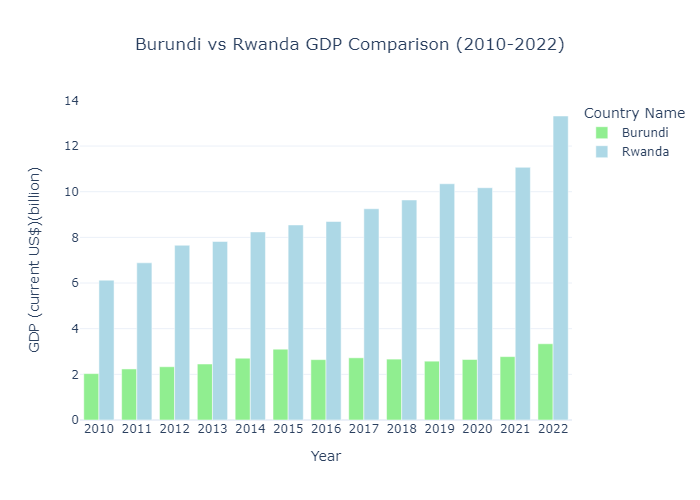

In [18]:
# Your figure creation code
fig = px.bar(data1, x='Year', y='GDP (current US$)(billion)', color='Country Name',
             title='Burundi vs Rwanda GDP Comparison (2010-2022)',
             labels={'GDP (current billion US$)': 'GDP (billion US$)', 'Year': 'Year'},
             template='plotly_white', barmode='group',
             color_discrete_map={'Burundi': 'lightgreen', 'Rwanda': 'lightblue'})  # Custom colors

fig.update_layout(title_x=0.5)  # Center the title

# Save the figure as a PNG file
fig.write_image("gdp_comparison.png")

# Display the figure
fig.show("png")


### Answer(Q1): Rwanda is performing better economically, with an average GDP of USD 9.06 billion, a GDP per capita of USD 749.05 and an average GDP growth rate of 6.71 %. In contrast, Burundi is falling behind, with an average GDP of USD 2.63 billion, a GDP per capita of USD 239.91 and a slow growth rate of 2.11 % over the years 2010-2022.

Overall Rwanda has a faster developing economy and  a better Quality of life. The next question explores if there are features/indicators that are contributing to Rwanda's economic growth in comparison to Burundi. 

# OBJECTIVE B: Feature Correlations

## Question 2 : What correlations exist between various features and GDP growth (annual %)?

### Correlation Matrix

 let's create a correlation matrix to explore the relationships of various economic indicators to GDP Growth rate for Burundi and Rwanda 

In [19]:
corr_mat = data1.drop(['Country Name', 'Year', 'Employers'], axis=1).corr()

# Unstacking the correlation matrix to create pairs
corr_pairs = corr_mat.unstack()

# Removing self-correlations (where a variable is correlated with itself)
corr_pairs = corr_pairs[corr_pairs != 1]

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Filtering for pairs associated with 'GDP (current US$)(billion)'
gdp_corr = sorted_pairs.loc[sorted_pairs.index.get_level_values(0) == 'GDP growth (annual %)' ]

gdp_corr


Series Name            Series Name                                                    
GDP growth (annual %)  Employment in agriculture                                         -0.433989
                       Inflation, GDP deflator (annual %)                                -0.338694
                       Government expenditure on education, total (% of GDP)             -0.234362
                       Population                                                         0.090046
                       Employment in industry                                             0.405492
                       Employment in services                                             0.444582
                       FDI, net inflows (% of GDP)                                        0.515586
                       GDP (current US$)(billion)                                         0.547757
                       GDP per capita (current US$)                                       0.589636
                      

#### Visualizing the data

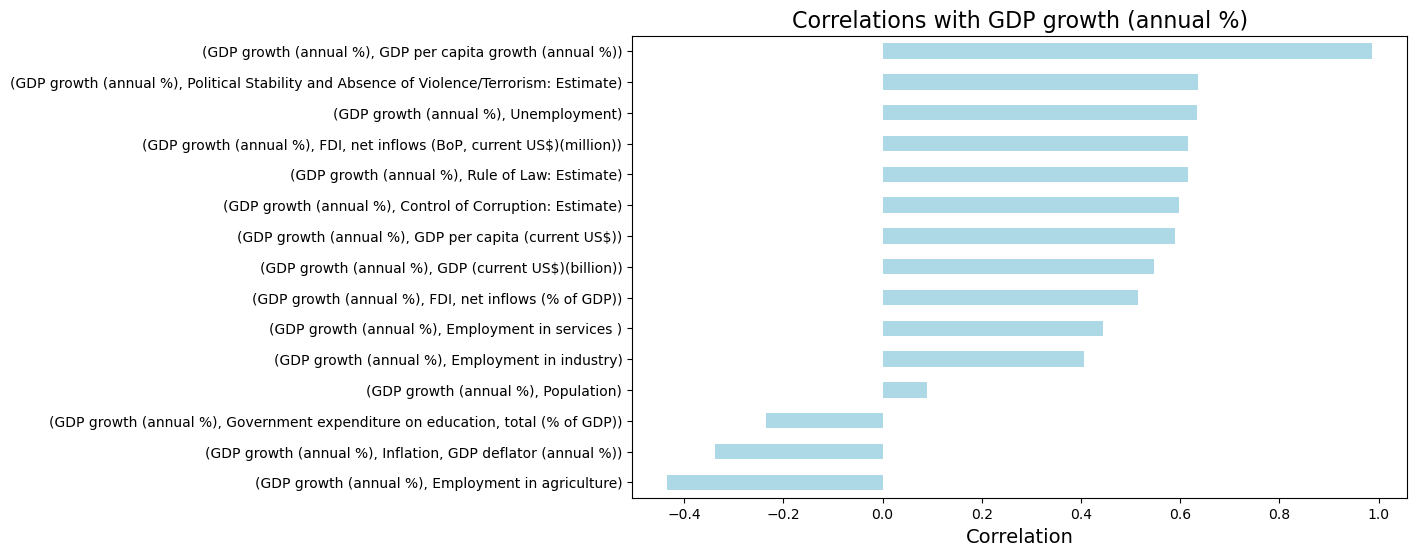

In [20]:

plt.figure(figsize=(10, 6))
gdp_corr.plot(kind='barh', color='lightblue')

# Add a title and labels
plt.title('Correlations with GDP growth (annual %)', fontsize=16)
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('')
plt.show()


### Answer: There is a correlation between  the other features and GDP growth (annual %). Some are negative and some are positive. 

#### As you look through the correlation data you might notice some anomalies in our results. Unemployment has a positive correlation to GDP growth rate whereas, normally, higher unemployment is generally associated with lower GDP growth rates  and how come Government expenditure on education, total (% of GDP) has a negative correlation to GDP growth rate? Does that mean an increase in investment in education contributes to a decrease in the GDP Growth rate? Let's explore these questions further!

# OBJECTIVE C: Unemployment Analysis

## QUESTION 3: What factors contribute to the positive correlation between GDP growth rate and unemployment in the dataset?

### Data Visualization of Unemployment column

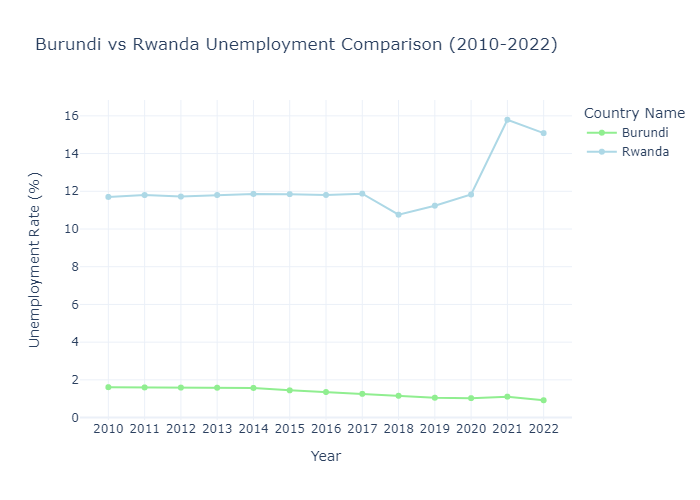

In [37]:
# Plotly line chart with new color combination using color names
fig = px.line(data1, 
              x='Year', 
              y='Unemployment', 
              color='Country Name',  
              title='Burundi vs Rwanda Unemployment Comparison (2010-2022)',  
              labels={'Unemployment': 'Unemployment Rate (%)', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
              color_discrete_map={'Burundi': 'lightgreen',  
                                  'Rwanda': 'lightblue'}  
             )
# Show the figure
fig.show("png")


In [22]:
# Calculate the average GDP unemployment rate for each country
average_gdp_un = data1.groupby('Country Name')['Unemployment'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_un = average_gdp_un['Burundi']
gdp_rwanda_un = average_gdp_un['Rwanda']

print(f"The average Unemployment rate  (2010-2022) for Burundi is {gdp_burundi_un:.2f} %.")
print(f"The average Unemployment rate (2010-2022) for Rwanda is {gdp_rwanda_un:.2f} %.")


The average Unemployment rate  (2010-2022) for Burundi is 1.33 %.
The average Unemployment rate (2010-2022) for Rwanda is 12.24 %.


#### i) What makes Burundi's unemployment rate so low compared to Rwanda's?

Let's look at employment sectors for each country in the year 2022

In [23]:
data1.columns # show the columns in our dataset

Index(['Country Name', 'Year', 'Control of Corruption: Estimate', 'Employers',
       'Employment in agriculture', 'Employment in industry',
       'Employment in services ', 'FDI, net inflows (% of GDP)',
       'FDI, net inflows (BoP, current US$)(million)',
       'GDP (current US$)(billion)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'GDP per capita growth (annual %)',
       'Government expenditure on education, total (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Political Stability and Absence of Violence/Terrorism: Estimate',
       'Population', 'Rule of Law: Estimate', 'Unemployment'],
      dtype='object', name='Series Name')

In [24]:
data1[data1['Year'] == '2022'] # lets filter for 2022

Series Name,Country Name,Year,Control of Corruption: Estimate,Employers,Employment in agriculture,Employment in industry,Employment in services,"FDI, net inflows (% of GDP)","FDI, net inflows (BoP, current US$)(million)",GDP (current US$)(billion),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Government expenditure on education, total (% of GDP)","Inflation, GDP deflator (annual %)",Political Stability and Absence of Violence/Terrorism: Estimate,Population,Rule of Law: Estimate,Unemployment
12,Burundi,2022,-1.518,1.157,85.058,3.119,11.823,0.386,12.884,3.339,1.849,259.025,-0.825,4.821,18.332,-1.189,12.890,-1.277,0.919
25,Rwanda,2022,0.561,0.043,55.993,14.437,29.570,2.993,398.599,13.316,8.158,966.571,5.686,4.752,15.914,0.031,13.777,0.146,15.085


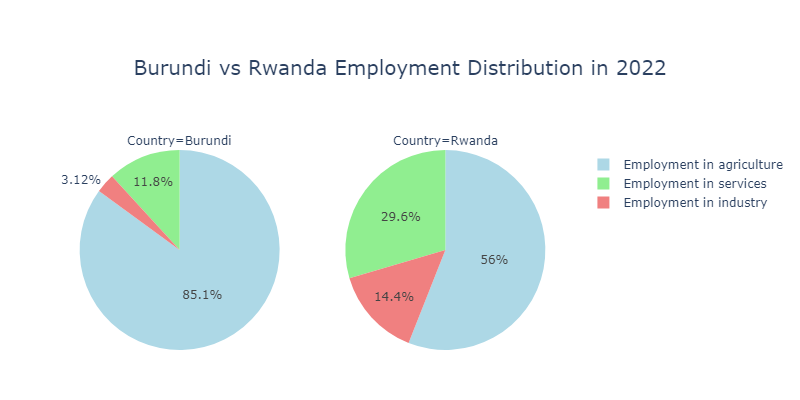

In [38]:

# Combined data for both Burundi and Rwanda (2022)
data = {
    'Country': ['Burundi'] * 3 + ['Rwanda'] * 3,
    'Sector': ['Employment in agriculture', 'Employment in industry', 'Employment in services'] * 2,
    'Employment': [85.058, 3.119, 11.823, 55.993, 14.437, 29.570]
}

# Create a single dataframe
df = pd.DataFrame(data)

# Create a pie chart with facetting by country
fig = px.pie(df, names='Sector', values='Employment', facet_col='Country',
             color_discrete_sequence=['lightblue', 'lightgreen', 'lightcoral'])

# Update layout
fig.update_layout(
    title_text='Burundi vs Rwanda Employment Distribution in 2022',
    title_x=0.5,
    title_font_size=20,
    template='plotly_white',
    width=800,
    height=400,
    margin=dict(t=150, l=50, r=50, b=50)
)

# Show figure
fig.show("png")

#### Answer(Q3):The positive correlation between GDP growth rate and unemployment in our dataset can be explained by the economic structure of Burundi. A low unemployment rate is normally considered a positive indicator, which in this case would imply that Burundi is creating many employment opportunities. However, as shown in the pie chart, 85.1% of employment in Burundi is concentrated in agriculture, compared to 56% in Rwanda. This suggests that the government of Burundi is creating more farming jobs instead of formal sector jobs. Given that Burundi gets its primary source of income from subsistence agriculture, most of the Burundian working population are farmers, contributing to the low unemployment rate and also the low GDP. 

#### In contrast, Rwanda’s growing GDP is linked to a more diversified economy, with increased investment in sectors like services and manufacturing, leading to more varied employment opportunities and a higher potential for long-term economic growth. This highlights the importance of sectoral diversification in boosting both GDP and employment quality.

# OBJECTIVE D: Education Analysis

## Question 4: What factors contribute to the negative correlation between GDP growth (annual %) and government expenditure on education (total % of GDP)?

#### Adding a column

let's add a government expenditure(current US$) column for the estimate amount spent on education.

In [26]:
data1['Expenditure on Education(US$ million)'] = (data1['Government expenditure on education, total (% of GDP)']/100   * data1['GDP (current US$)(billion)']) * 1000
# (expenditure(% of GDP)/ 100 * gdp)*1000 for millions instead of billions

In [27]:
data1.head()

Series Name,Country Name,Year,Control of Corruption: Estimate,Employers,Employment in agriculture,Employment in industry,Employment in services,"FDI, net inflows (% of GDP)","FDI, net inflows (BoP, current US$)(million)",GDP (current US$)(billion),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %),"Government expenditure on education, total (% of GDP)","Inflation, GDP deflator (annual %)",Political Stability and Absence of Violence/Terrorism: Estimate,Population,Rule of Law: Estimate,Unemployment,Expenditure on Education(US$ million)
0,Burundi,2010,-1.169,0.679,88.288,2.989,8.723,0.038,0.781,2.032,5.124,222.661,0.318,6.775,8.562,-1.626,9.127,-1.205,1.612,137.66800
1,Burundi,2011,-1.208,0.683,87.740,3.102,9.158,0.150,3.355,2.236,4.033,236.451,0.412,6.319,8.364,-1.807,9.456,-1.154,1.599,141.29284
2,Burundi,2012,-1.469,0.691,87.195,3.231,9.574,0.026,0.605,2.333,4.447,238.206,0.824,6.168,14.294,-1.705,9.795,-1.084,1.591,143.89944
3,Burundi,2013,-1.426,0.705,86.715,3.371,9.914,4.761,116.727,2.452,4.924,241.548,1.264,5.995,7.953,-1.350,10.150,-1.076,1.584,146.99740
4,Burundi,2014,-1.268,0.719,86.185,3.497,10.318,3.021,81.747,2.706,4.241,257.819,0.811,6.785,5.306,-0.784,10.495,-0.970,1.572,183.60210


#### calculate the average Government expenditure on education, total (% of GDP)

In [28]:
# Calculate the average Government expenditure on education, total (% of GDP) for each country
average_gdp_ex = data1.groupby('Country Name')['Government expenditure on education, total (% of GDP)'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_ex = average_gdp_ex['Burundi']
gdp_rwanda_ex = average_gdp_ex['Rwanda']

print(f"The average Government expenditure on education, total (% of GDP)(2010-2022) for Burundi is {gdp_burundi_ex:.2f} %.")
print(f"The average Government expenditure on education, total (% of GDP) for Rwanda is {gdp_rwanda_ex:.2f} %.")


The average Government expenditure on education, total (% of GDP)(2010-2022) for Burundi is 5.64 %.
The average Government expenditure on education, total (% of GDP) for Rwanda is 4.04 %.


### Observation :The Education 2030 Framework endorsed a benchmark of 4% to 6% of GDP, for a government financing of education. Both Rwanda and Burundi have attained this benchmark in the long term, with Burundi investing an average of 1.6% of its GDP more than Rwanda. However this does not mean that Burundi invests more in its education system considering the different sizes of the GDPs.

#### i) What is the correlation between Expenditure on Education(US$ million) and GDP Growth rate.

In [29]:
# Check for the correlation between Expenditure on Education and GDP Growth Rate
correlation = data1['Expenditure on Education(US$ million)'].corr(data1['GDP growth (annual %)'])

print(f"Correlation between Expenditure on Education and GDP Growth rate: {correlation}")


Correlation between Expenditure on Education and GDP Growth rate: 0.5815649595158175


There is a positive correlation (0.581565) between the newly created column, Expenditure on Education (US$ million), and the GDP Growth rate, indicating that higher education expenditure is associated with increased economic growth.

#### Visualization of the trend for Expenditure on Education(US$ million)

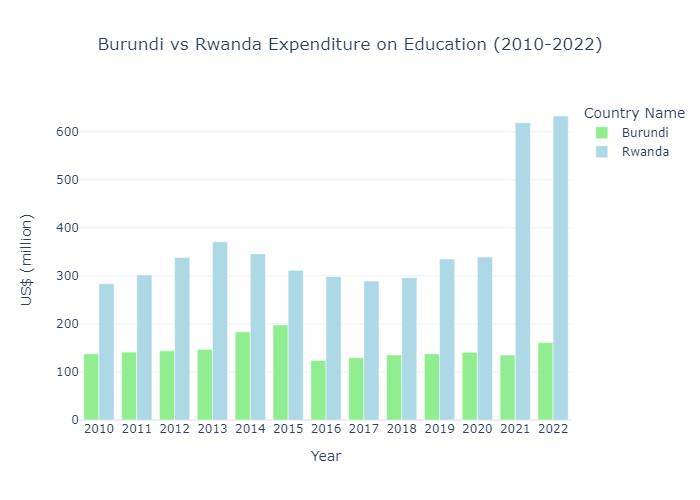

In [39]:
fig = px.bar(data1, 
             x='Year', 
             y='Expenditure on Education(US$ million)', 
             color='Country Name',  # Different colors for each country
             title='Burundi vs Rwanda Expenditure on Education (2010-2022)',
             labels={'Expenditure on Education(US$ million)': 'US$ (million)', 'Year': 'Year'},  # Labels for axes
             template='plotly_white',  # Clean white template
             color_discrete_map={'Burundi': 'lightgreen', 'Rwanda': 'lightblue'},  # Custom colors
             barmode='group'  # Grouped bar chart
)

# Update layout to center the title
fig.update_layout(
    title_x=0.5,  # Center the title
   
)

# Show the figure
fig.show("png")

In [31]:
# Calculate the average Government expenditure on education, total (% of GDP) for each country
average_gdp_ed = data1.groupby('Country Name')['Expenditure on Education(US$ million)'].mean()

# Extract values for Burundi and Rwanda
gdp_burundi_ed = average_gdp_ed['Burundi']
gdp_rwanda_ed = average_gdp_ed['Rwanda']

print(f"The average Government expenditure on education(2010-2022) for Burundi is ${gdp_burundi_ed:.2f} million.")
print(f"The average Government expenditure on education (2010-2022) for Rwanda is ${gdp_rwanda_ed:.2f} million.")


The average Government expenditure on education(2010-2022) for Burundi is $147.34 million.
The average Government expenditure on education (2010-2022) for Rwanda is $366.32 million.


OBSERVATION: The Government of Rwanda invests in its education system more than double of what the Government of Burundi invests.

### ANSWER (Q4): The negative correlation between GDP growth (annual %) and government expenditure on education (total % of GDP) is observed because Burundi, despite its lower GDP growth rate, allocates a higher percentage of its GDP to education. This higher percentage does not necessarily translate to greater actual funding compared to Rwanda. This suggests that while the percentage of GDP spent on education is higher in Burundi, it does not directly lead to better economic outcomes. In contrast, greater overall investment in education, when measured in US$ million, tends to be associated with higher GDP growth rates, indicating that total expenditure on education has a more significant impact on economic growth than the percentage of GDP allocated.




## QUESTION 5: is there a relationship between educational outcomes and GDP growth.

The education outcomes data sets, although sourced from the same sources as the main dataset, cover different reporting periods and have significant gaps. For instance, literacy rates are from 2022, out-of-school rates cover 2017-2019, and education levels of the labor force are from 2020. This inconsistency in data availability means they need to be analyzed separately to ensure accurate comparisons and analysis.

##### Analysis of the literacy rates

In [32]:
# literacy rate data 2020 for Burundi and Rwanda 
Literacy_Rate = {
    'Country': ['Rwanda', 'Burundi'],
    'Year': [2022, 2022],
    'Value': [78.763, 75.540]
}

Literacy_rate = pd.DataFrame(Literacy_Rate)
Literacy_rate 

,Country,Year,Value
0,Rwanda,2022,78.763
1,Burundi,2022,75.540


In [33]:
# Filter data for Expenditure_on_Education for the year 2022
Expenditure_on_Education_2022 = data1[(data1['Year'] == '2022')]

In [34]:
# Select relevant columns
Expenditure_on_Education_2022 = Expenditure_on_Education_2022[['Country Name', 'Expenditure on Education(US$ million)']]
Expenditure_on_Education_2022.head()

Series Name,Country Name,Expenditure on Education(US$ million)
12,Burundi,160.97319
25,Rwanda,632.77632


OBSERVATION: Despite similar literacy rates in 2022 (Rwanda: 78.763%, Burundi: 75.540%), Rwanda demonstrates significantly higher GDP growth compared to Burundi. This highlights that literacy rates alone do not capture the full impact of education spending on economic performance. We can analyze a few other factors.

In [35]:
# let's load our datasets

##### Analysis on Education levels of the Labour Force

In [40]:
# Education levels of the labour Force for 2020 for Burundi and Rwanda 
Labour_data = pd.read_csv('Labour-force.csv')
Labour_data

,Country,Labour Force,2020
0,Burundi,Advanced education (% ),59.157
1,Burundi,Basic education (% ),76.653
2,Burundi,Intermediate education (%),50.635
3,Rwanda,Advanced education (% ),77.841
4,Rwanda,Basic education (% ),63.563
5,Rwanda,Intermediate education (%),58.590


##### Data visualization of Education Levels in the Labour Force (2020)

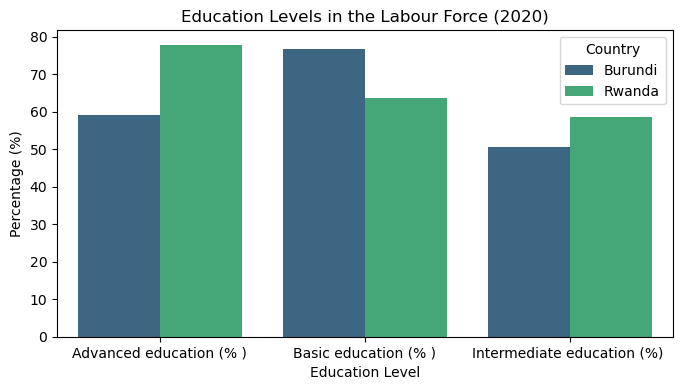

In [41]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Labour Force', y='2020', hue='Country', data=Labour_data, palette='viridis')
plt.title('Education Levels in the Labour Force (2020)')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')

plt.legend(title='Country')
plt.tight_layout()
plt.show()

OBSERVATION: The data reveals that Rwanda’s higher proportion of advanced education in its labor force (77.84% vs. 59.16% in Burundi) aligns with its higher economic growth, suggesting that a more educated workforce contributes to higher productivity and innovation. In contrast, Burundi’s employment is heavily concentrated in agriculture (over 85%), which explains the higher number of people with only basic education, this generally offers lower productivity and fewer growth opportunities. Rwanda, with 56% of employment in agriculture and the remaining in sectors like services and manufacturing, shows a more diversified economic structure. This diversification can contribute to higher GDP growth by providing a broader range of employment opportunities and fostering economic development in multiple sectors. In contrast, Burundi relies heavily on agriculture, which can restrict economic progress. This difference in education and employment structure helps explain why Rwanda has a higher GDP growth rate than Burundi.

##### Analysis for out of school children (2017-2019)

In [42]:
# out of school rate data for 2017-2019 for Burundi and Rwanda 
out_of_school = pd.read_csv('out-of-school.csv')

In [43]:
out_of_school

,Country,Year,male,female,Total
0,Burundi,2017,367182,309342,676524
1,Burundi,2018,407234,346351,753585
2,Burundi,2019,451964,385769,837733
3,Rwanda,2017,247025,216092,463117
4,Rwanda,2018,257234,234518,491752
5,Rwanda,2019,283222,264054,547276


In [44]:
out_of_school.columns

Index(['Country ', 'Year', 'male', 'female', 'Total'], dtype='object')

In [45]:
# Drop the 'male' and 'female' columns from the DataFrame
out_of_school = out_of_school.drop(['male', 'female'], axis=1)


In [46]:
out_of_school

,Country,Year,Total
0,Burundi,2017,676524
1,Burundi,2018,753585
2,Burundi,2019,837733
3,Rwanda,2017,463117
4,Rwanda,2018,491752
5,Rwanda,2019,547276


#### Data visualization for out of school Children(2017-2019)

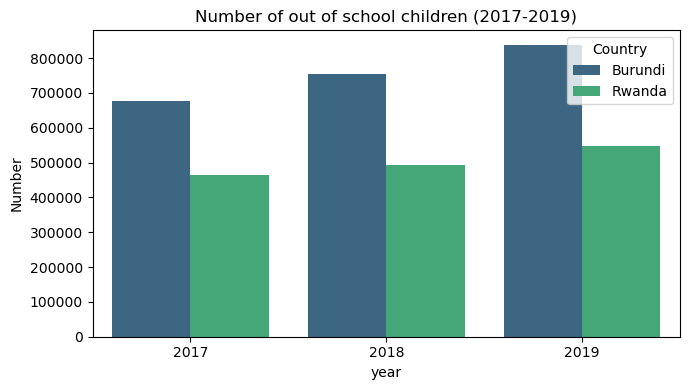

In [60]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Year', y='Total', hue='Country ', data=out_of_school, palette='viridis')
plt.title('Number of out of school children (2017-2019)')
plt.xlabel('year')
plt.ylabel('Number')

plt.legend(title='Country')
plt.tight_layout()
plt.show()

Let's calculate the percentage increase over the years

In [48]:
# Pivot the DataFrame to get years as columns for each country
df_pivot =out_of_school.pivot(index='Country ', columns='Year', values='Total')

# Calculate the percentage increase from 2017 to 2019
df_pivot['Percentage Increase'] = ((df_pivot[2019] - df_pivot[2017]) / df_pivot[2017]) * 100

# Print the result
print(df_pivot[['Percentage Increase']])

Year      Percentage Increase
Country                      
Burundi             23.829014
Rwanda              18.172298


OBSERVATION: The data shows a clear rise in the number of out-of-school children in both Burundi and Rwanda from 2017 to 2019, with Burundi seeing a 24% increase and Rwanda 18%. Burundi's higher numbers could suggest that Rwanda's greater investment in education is helping manage the issue more effectively. However, both countries face challenges, and while Rwanda is investing more, additional efforts may be needed to further reduce the number of out-of-school children. Addressing these rising numbers will require both countries to continue improving educational access and infrastructure.

### ANSWER(Q5): Yes, there is a relationship between educational outcomes and GDP growth, but it goes beyond just literacy rates. Despite similar literacy rates in 2022 (Rwanda: 78.76%, Burundi: 75.54%), Rwanda shows much higher GDP growth. This is likely because Rwanda has a higher proportion of people with advanced education (77.84% vs. 59.16% in Burundi), which leads to a more skilled workforce, greater productivity, and innovation. Rwanda’s economy is more diversified, with only 56% of its workforce in agriculture, compared to over 85% in Burundi. This diversification, along with higher education levels, contributes to Rwanda’s stronger economic performance, while Burundi's economy remains largely dependent on low-productivity agricultural jobs.

# OBJECTIVE E : Political Analysis

## Question 6: How is political stability influencing economic growth in Burundi and Rwanda?

 The correlation results show that the political indicators in our dataset have a positive correlation to economic growth rate. Control of Corruption has a correlation of 0.598350 , Rule of Law has a correlation of 0.616465, and Political Stability and Absence of Violence/Terrorism has a correlation of 0.635784. Political stability plays a significant role in contributing to economic growth. These indicators are measured on a scale ranging from -2.5 representing the lowest (worst) governance score and 2.5, the highest (best) governance score.


#### Data visualization for all the political indicators

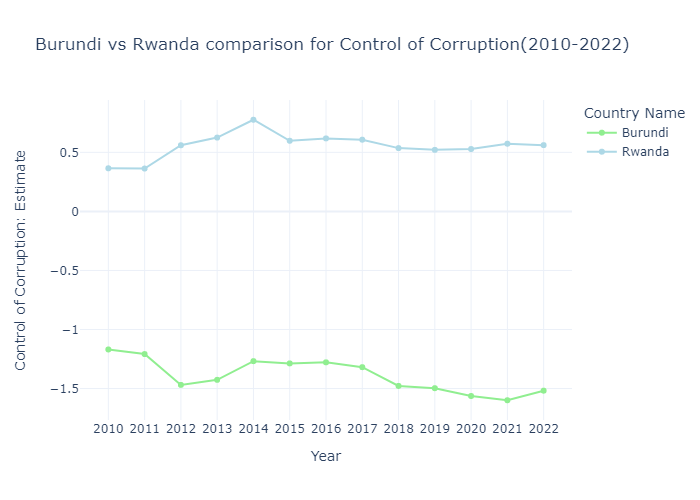

In [59]:
# Plotly line chart Control of Corruption: Estimate
fig = px.line(data1, 
              x='Year', 
              y='Control of Corruption: Estimate', 
              color='Country Name',  
              title='Burundi vs Rwanda comparison for Control of Corruption(2010-2022)',  
              labels={'Unemployment': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
              color_discrete_map={'Burundi': 'lightgreen',  
                                  'Rwanda': 'lightblue'}  
             )
# Show the figure
fig.show("png")



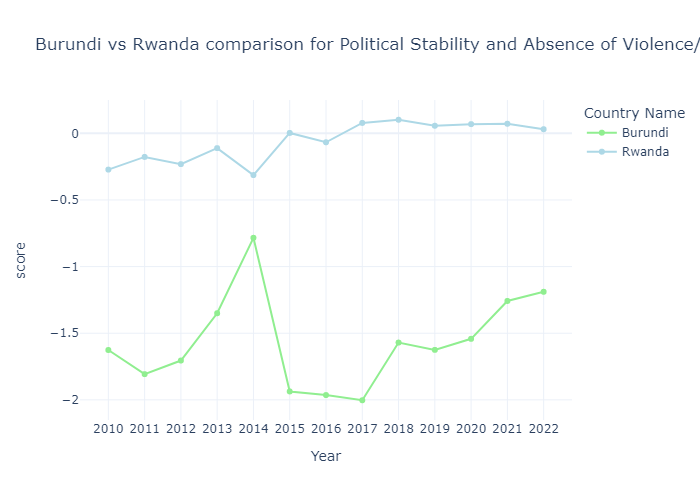

In [58]:
# Plotly line chart for Political Stability and Absence of Violence/Terrorism: Estimate
fig = px.line(data1, 
              x='Year', 
              y= 'Political Stability and Absence of Violence/Terrorism: Estimate', 
              color='Country Name',  
              title='Burundi vs Rwanda comparison for Political Stability and Absence of Violence/Terrorism (2010-2022)',  
              labels={ 'Political Stability and Absence of Violence/Terrorism: Estimate': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
              color_discrete_map={'Burundi': 'lightgreen',  
                                  'Rwanda': 'lightblue'}  
             )
# Show the figure
fig.show("png")



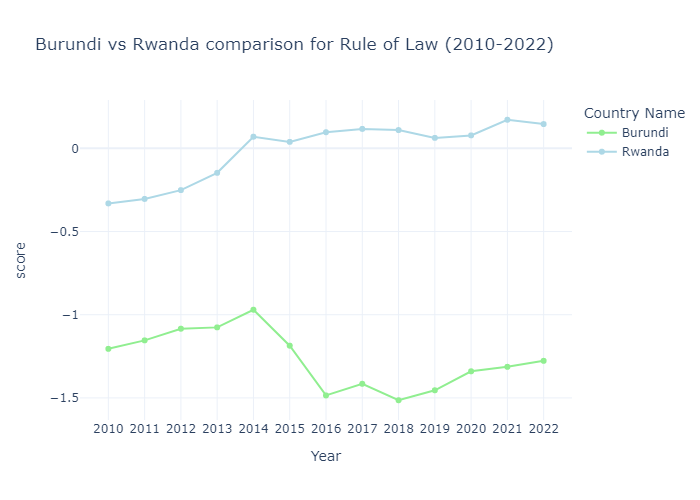

In [57]:
# Plotly line chart for Rule of Law: Estimate
fig = px.line(data1, 
              x='Year', 
              y= 'Rule of Law: Estimate', 
              color='Country Name',  
              title='Burundi vs Rwanda comparison for Rule of Law (2010-2022)',  
              labels={ 'Rule of Law: Estimate': 'score', 'Year': 'Year'},  
              template='plotly_white',  
              markers=True,  # Show markers at each data point
              color_discrete_map={'Burundi': 'lightgreen',  
                                  'Rwanda': 'lightblue'}  
             )
# Show the figure
fig.show("png")



### Answer(Q6): According to the data, Rwanda shows better governance, with values for political stability and the rule of law improving from negative to positive over the years, reflecting significant progress in its governance framework. The Rwandan government has implemented strict anti-corruption laws and policies, contributing to stronger performance and economic development. This political stability has brought several benefits to Rwanda, including increased foreign direct investment (FDI), improved investor confidence, and a more diversified economy, particularly in sectors like services and manufacturing. In contrast, Burundi has shown consistently negative values across political indicators from 2010-2022, indicating ongoing challenges with political instability and governance issues. This instability contributes to economic stagnation, as it hinders investment, development, and sustainable growth opportunities in Burundi.

# OBJECTIVE F: Foreign Direct Investment (FDI) vs economic growth

## Question 7: How does Foreign Direct Investment (FDI) impact economic growth in Rwanda and Burundi from 2010 to 2022? Additionally, how has the FDI growth rate influenced the overall economic performance of Rwanda and Burundi?

In [52]:
data_rwanda = data1[data1['Country Name'] == 'Rwanda']
data_burundi = data1[data1['Country Name'] == 'Burundi']

# Calculate average and maximum FDI and GDP growth rates
average_fdi_rwanda = data_rwanda['FDI, net inflows (BoP, current US$)(million)'].mean()
max_fdi_rwanda = data_rwanda['FDI, net inflows (BoP, current US$)(million)'].max()
average_gdp_growth_rwanda = data_rwanda['GDP growth (annual %)'].mean()

average_fdi_burundi = data_burundi['FDI, net inflows (BoP, current US$)(million)'].mean()
max_fdi_burundi = data_burundi['FDI, net inflows (BoP, current US$)(million)'].max()
average_gdp_growth_burundi = data_burundi['GDP growth (annual %)'].mean()

print(f"Rwanda: Average FDI = ${average_fdi_rwanda:.2f} million, Max FDI = ${max_fdi_rwanda:.2f} million, Average GDP Growth = {average_gdp_growth_rwanda:.2f}%")
print(f"Burundi: Average FDI = ${average_fdi_burundi:.2f} million, Max FDI = ${max_fdi_burundi:.2f} million, Average GDP Growth = {average_gdp_growth_burundi:.2f}%")


Rwanda: Average FDI = $250.31 million, Max FDI = $398.60 million, Average GDP Growth = 6.71%
Burundi: Average FDI = $22.06 million, Max FDI = $116.73 million, Average GDP Growth = 2.11%


### Data visualization for Average FDI and Max FDI for both countries

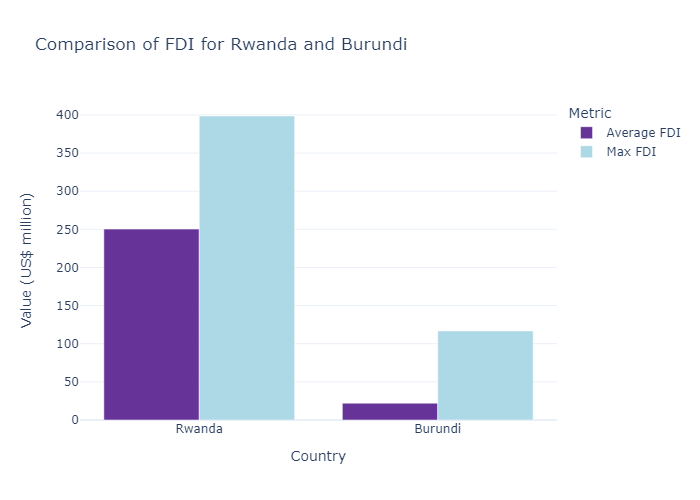

In [61]:

# Data
data = {
    'Country': ['Rwanda', 'Burundi', 'Rwanda', 'Burundi'],
    'Metric': ['Average FDI', 'Average FDI', 'Max FDI', 'Max FDI'],
    'Value': [250.31, 22.06, 398.60, 116.73]
}
#create a DataFrame
df = pd.DataFrame(data)

# Create a bar graph using Plotly Express
fig = px.bar(df, 
             x='Country', 
             y='Value', 
             color='Metric', 
             barmode='group',
             labels={'Value': 'Value (US$ million)', 'Country': 'Country'},
             title='Comparison of FDI for Rwanda and Burundi',
             template='plotly_white',
             color_discrete_map={'Average FDI': 'rebeccapurple',  
                                  'Max FDI': 'lightblue'}  )

# Show the figure
fig.show("png")


OBSERVATION: Rwanda has a much higher average FDI (250.31 million USD) and a stronger average GDP growth rate (6.71%) compared to Burundi, which has a lower average FDI (22.06 million USD) and GDP growth (2.11%). Rwanda's maximum FDI ($398.60 million) further highlights its ability to attract foreign investment, likely contributing to its higher GDP growth.

### Data Visualization of FDI, net inflows

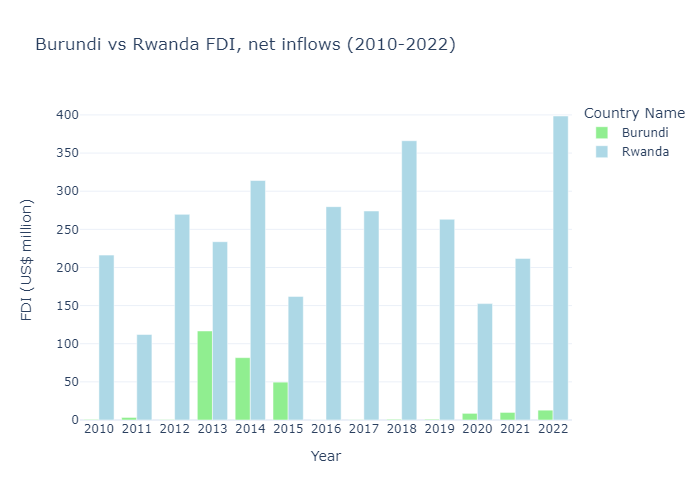

In [55]:
fig = px.bar(data1,
      x='Year', 
      y='FDI, net inflows (BoP, current US$)(million)',  # FDI values on the y-axis
      color='Country Name', 
      title='Burundi vs Rwanda FDI, net inflows (2010-2022)',  # Updated year range
      barmode='group',
      template='plotly_white',
      labels={'Year': 'Year', 'FDI, net inflows (BoP, current US$)(million)': 'FDI (US$ million)'},
      color_discrete_map={'Rwanda': 'lightblue', 'Burundi': 'lightgreen'}
)

fig.show("png")


### ANSWER(Q7): Foreign Direct Investment (FDI) significantly impacts economic growth in Rwanda and Burundi. Rwanda's higher average FDI of 250.31 million USD, with a maximum of 398.60 million USD, correlates with a strong average GDP growth rate of 6.71%. In contrast, Burundi’s lower FDI, averaging 22.06 million USD with a maximum of 116.73 million USD, corresponds with a much lower GDP growth rate of 2.11%. The positive correlation of 0.617 between FDI and GDP growth indicates that increased FDI generally supports higher economic growth, as seen in Rwanda’s stronger performance compared to Burundi.

## Key Findings
1. **Economic Performance:** 
Rwanda has strong GDP growth and foreign direct investment (FDI), backed by a diverse economy and good governance. In contrast, Burundi faces challenges that slow its economic progress. Burundi relies heavily on **agriculture**, with **85.1%**of its workforce in this sector, while only **56%** of Rwandans work in agriculture. This heavy dependence on farming limits Burundi's economic diversity and growth potential.
Employment distribution

2. **Government Spending on Education:** 
From 2010 to 2022, Burundi spent an average of 147.34 million USD on education each year, while Rwanda spent 366.32 million USD on average during the same period.

3. **Investment and Growth Metrics:**
Rwanda has a much higher average FDI of 250.31 million USD and a stronger average GDP growth rate of 6.71%, compared to Burundi's lower average FDI of 22.06 million USD and GDP growth of 2.11%. Furthermore, Rwanda’s maximum FDI is 398.60 million USD, highlighting its ability to attract foreign investment, which likely supports its higher GDP growth.

4. **Political Stability:**
Rwanda demonstrates better governance, with improvements in political stability and the rule of law shifting from negative to positive values on a scale of -2.5 to 2.5 over the years. In contrast, Burundi has consistently negative political indicators, remaining below zero on this scale from 2010 to 2022, reflecting ongoing challenges with political instability. This instability hinders investment and sustainable growth opportunities, contributing to economic stagnation in Burundi.
## Recommendations

**Economic Diversification:**

- Establish an Agricultural Transformation Agency similar to Ethiopia’s to modernize agriculture, focusing on high-potential sectors like coffee and tea production.
- Promote digital literacy programs to prepare the workforce for emerging job markets and support innovation hubs to encourage entrepreneurship among youth.
- Promote tourism as a means to diversify the economy, leveraging Burundi's natural beauty and cultural heritage to attract visitors and boost local businesses.
  
**Strengthen Governance and Political Stability:**

- Create independent bodies, such as an anti-corruption commission, to enhance transparency and accountability in government operations.
- Implement strict laws against corruption and ensure regular audits of public finances to build trust in government institutions.

**Enhance Education and Skill Development:**

- Increase investment in vocational training programs to equip individuals with skills relevant to the job market, particularly in technology and trades.
- Expand access to higher education and create incentives for teacher training to improve the quality of education across all levels.
Create programs to increase digital literacy at all educational levels to prepare the workforce for a technology-driven economy.

# CONCLUSION

The analysis reveals key differences between Rwanda and Burundi. Rwanda has better economic performance, with higher Foreign Direct Investment (FDI) and GDP growth, thanks to a diverse economy and improved governance. In contrast, Burundi lags with lower FDI and slower economic growth, partly due to ongoing political instability and a heavy dependence on agriculture.

Education data shows that Rwanda’s more educated workforce contributes to its higher economic growth. Burundi, with more people in agriculture and lower education levels, struggles to advance economically. Both countries have seen more children out of school, with Burundi’s numbers being much higher. This suggests that while Rwanda is making progress, both nations need to enhance their educational systems to improve economic and social outcomes.